In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### 1- Read Salaries.csv as a Dataframe called df

In [3]:
df = pd.read_csv('../input/sf-salaries/Salaries.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 2- View the head of the Dataframe

In [4]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### 3- Check how many entries, columns and Data types of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


### 4- Check Null values

In [6]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

### 5- percentage of missing values in each Columns

In [7]:
for col in df.columns:
    prc_null = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(prc_null*100)))

Id - 0%
EmployeeName - 0%
JobTitle - 0%
BasePay - 0%
OvertimePay - 0%
OtherPay - 0%
Benefits - 24%
TotalPay - 0%
TotalPayBenefits - 0%
Year - 0%
Notes - 100%
Agency - 0%
Status - 74%


### 6- What is the average TotalPay ?

In [8]:
df['TotalPay'].mean()

74768.32197169267

### 7- What is the highest amount of TotalPay in the dataset ? 

In [9]:
df['TotalPay'].max()

567595.43

### 8- What was the average (mean) TotalPay of all employees per year?

In [10]:
df.groupby('Year').mean()['TotalPay']

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

### 9- Distribution of the Total Pay

<AxesSubplot:xlabel='TotalPay', ylabel='Count'>

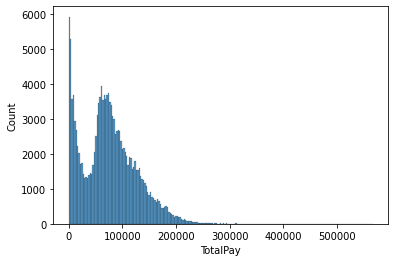

In [11]:
sns.histplot(df['TotalPay'])

### 10- Number of Unique Job Titles

In [12]:

print('Number of unique job titles:', df['JobTitle'].nunique())


Number of unique job titles: 2159


### 11- What are the top 5 most common jobs?

In [13]:
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

### 12- Number of Job Titles Contain Captain


In [14]:
df['JobTitle'].str.contains('captain', case=False).sum()

552

### 13- Display the Employees that thier Job Titles Name Contain Captain


In [15]:
df.columns
df[df['JobTitle'].str.contains('captain', case=False)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.0,87082.62,110804.3,NaN,297608.92,297608.92,2011,NaN,San Francisco,NaN
17,18,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.87,119397.26,18625.08,NaN,278569.21,278569.21,2011,NaN,San Francisco,NaN
22,23,GEORGE GARCIA,"CAPTAIN, FIRE SUPPRESSION",140546.88,93200.58,39955.25,NaN,273702.71,273702.71,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116604,116605,Gregory L Stewart,"Captain, Fire Suppression",73355.21,18517.18,49917.73,25608.77,141790.12,167398.89,2014,NaN,San Francisco,PT
120867,120868,Michael J Moran,Captain 3,7660.0,1496.09,126560.36,2189.51,135716.45,137905.96,2014,NaN,San Francisco,PT
122361,122362,Michael V Rolovich,"Captain, Fire Suppression",0.0,0.0,130320.75,0.0,130320.75,130320.75,2014,NaN,San Francisco,PT
126588,126589,Stephen M Tittel,Captain 3,68491.89,0.0,23721.91,19020.79,92213.80,111234.59,2014,NaN,San Francisco,PT


### 14- Function to check if Jop Title contain word "Chief"

In [16]:
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

### 15- Number of Job Titles Contain Chief

In [17]:
sum(df['JobTitle'].apply(lambda x: chief_string(x)))

627

### 16- What is the job title of ALBERT PARDINI

In [18]:

df[df['EmployeeName']=='ALBERT PARDINI']['JobTitle']

2    CAPTAIN III (POLICE DEPARTMENT)
Name: JobTitle, dtype: object

### 17- How much does ALBERT PARDINI make (Total pay benefits)

In [19]:
df[df['EmployeeName']=='ALBERT PARDINI']['TotalPayBenefits']

2    335279.91
Name: TotalPayBenefits, dtype: float64